# D208: Predictive Modeling - Performance Assessment - Task 1: Linear Regression Modeling
***

### By: Leng Yang
### Student ID: 012298452
### Date: August 16, 2024
***
<br>
<br>
<br>

## Table of Contents
* [A1. Research Question](#A1)
* [A2. Goals](#A2)
* [B1. Summary of Assumptions](#B1)
* [B2. Tool Benefits](#B2)
* [B3. Appropriate Technique](#B3)
* [C1. Data Cleaning](#C1)
* [C2. Summary Statistics](#C2)
* [C3. Visualizations](#C3)
* [C4. Data Transformation](#C4)
* [C5. Prepared Data Set](#C5)
* [D1. Initial Model](#D1)
* [D2. Justification of Model Reduction](#D2)
* [D3. Reduced Linear Regression Model](#D3)
* [E1. Model Comparison](#E1)
* [E2. Output and Calculations](#E2)
* [E3. Code](#E3)
* [F1. Results](#F1)
* [F2. Recommendations](#F2)
* [G. Panopto Demonstration](#G)
* [H. Sources of Third-Party Code](#H)
* [I. Sources](#I)

<BR>

## A1. Research Question <a class="anchor" id="A1"></a>

The research question for this paper is: what factors most significantly impact the length of the initial hospital stay?

<BR>

## A2. Goals <a class="anchor" id="A2"></a>

My analysis aims to determine which independent factors contribute significantly to the length of an initial hospital stay. This analysis is relevant as hospitals continually struggle with patient capacity and staffing needs. Hospitals constantly need help with patient capacity as each serves vast communities. This issue is more prevalent in a post-Covid era where more patients are being hospitalized due to severe symptoms requiring hospital admittance. Staffing is ongoing as healthcare providers leave the profession due to long working hours and burnout. Determining factors that lead to the length of an initial hospital stay may give better insight as it may assist hospital systems in planning around such circumstances as patient capacity, staffing shortages, and others.

<BR>

## B1. Summary of Assumptions <a class="anchor" id="B1"></a>

The analysis will be performed using a linear regression model. It is important to note that some assumptions and limitations are attached. Below are four assumptions, as mentioned by Bobbitt (2021).

* A linear relationship exists between the dependent variable and each independent variable.  
An excellent way to determine whether a linear relationship exists between two variables is via a scatterplot, which looks at whether the points increase or decrease roughly along a straight diagonal line.

* There is no multicollinearity such that none of the predictor variables are highly correlated with one another.  
Multicollinearity occurs when the variables are highly correlated with each other. This assumption could be checked using various methods, such as correlation matrices or determining each variable's variance inflation factor (VIF). Leaving in predictor variables that are highly correlated with each other would cause unreliable estimates of those variables.

* There is multivariate normality.  
Multivariate normality suggests that the residuals of the model, determined as the difference between the observed and predicted values, follow a normal distribution. This assumption can be checked visually using a Q-Q plot or a histogram.

* There is homoscedasticity.  
The presence of homoscedasticity assumes that the variance of the residuals should be consistent across the model. This assumption can be checked via a scatterplot with the residuals against the fitted values. If there are no discernable patterns in the plot, then the model is homoscedastic; otherwise, if a pattern exists, then the model is said to be heteroscedastic, thus leading to an unreliable model.

<BR>

## B2. Tool Benefits <a class="anchor" id="B2"></a>

The analysis will be conducted using Python. Python will be used because it can handle large datasets particularly well without sacrificing many resources. Python's syntax allows better code readability and code debugging. Additionally, Python contains many data science packages that make the process of data wrangling and modeling easier to work with. Below are some of the packages that are used in the analysis.

* Pandas: used for data storage in a tabular format as well as for data manipulation
* Numpy: used for numerical calculations and statistics
* Statsmodels: used for modeling linear regression
* Matplotlib and Seaborn: both are used for generating data visualizations
* Scikit-Learn: used for data transformation

In [17]:
#Set up initial environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [18]:
#Print working versions
from platform import python_version
print("python:", python_version())
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("statsmodel.api:", sm.__version__)

python: 3.11.7
pandas: 2.1.4
numpy: 1.26.4
statsmodel.api: 0.14.0


<BR>

## B3. Appropriate Technique <a class="anchor" id="B3"></a>

A multiple linear regression model will be used to perform this analysis. This model will be used because the research topic deals with one dependent variable, length of initial hospital stay, and its relation with multiple independent factors. Additionally, this model will be used because this topic is one of regression, focusing on a continuous response variable represented as a floating point number, thus having it interpreted as the number of days with values after the decimal representing a proportion of a day. Using the model and statistical tests, I can determine which factors contribute statistically significantly to the length of an initial hospital stay.

<BR>

## C1. Data Cleaning <a class="anchor" id="C1"></a>

The data has to be cleaned first before modeling can begin to try to minimize errors. Before cleaning, the column names were re-orchestrated using a snake-case naming convention for clarity and easier handling. The first thing checked was whether the data set contained duplicates. As there were no duplicates, no records were dropped. Next was the check for missing values, of which none were found. Next was the check for outliers. Although outliers were found, none were removed as the values for each variable were within a logical and reasonable range.

Additionally, modifying values without first consorting to the data source would violate medical data privacy rules and subject the analysis to ethical issues. The `zip code` variable was found to be initially imported as a number, so it was changed to an object type and had the missing leading zeroes filled in. Lastly, the values of each variable were examined to ensure they were in line with that of the data dictionary.

In [25]:
#Read data file into dataframe
df = pd.read_csv('medical_clean.csv')

In [26]:
# Standardize column names using snake_case and re-express names for comprehensiveness (Yang, 2024).
col_names = ['case_order', 'customer_id', 'interaction', 'uid', 'city', 'state', 'county', 'zip', 'latitude', 'longitude',
             'population', 'area', 'timezone', 'job', 'children', 'age', 'income', 'marital', 'gender', 'readmission', 
             'vit_d_level', 'doc_visits', 'full_meals_eaten', 'vit_d_supp', 'soft_drink', 'initial_admin', 'high_blood', 'stroke', 'complication_risk', 'overweight',
             'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain', 'anxiety', 'allergic_rhinitis', 'reflux_esophagitis', 'asthma', 'services', 'initial_days', 
             'total_charge', 'additional_charges', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'item_6', 'item_7', 'item_8']
df.columns = col_names
df.head()

,case_order,customer_id,interaction,uid,city,state,county,zip,latitude,longitude,population,area,timezone,job,children,age,income,marital,gender,readmission,vit_d_level,doc_visits,full_meals_eaten,vit_d_supp,soft_drink,initial_admin,high_blood,stroke,complication_risk,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services,initial_days,total_charge,additional_charges,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [27]:
#Look for missing values and initial data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_order          10000 non-null  int64  
 1   customer_id         10000 non-null  object 
 2   interaction         10000 non-null  object 
 3   uid                 10000 non-null  object 
 4   city                10000 non-null  object 
 5   state               10000 non-null  object 
 6   county              10000 non-null  object 
 7   zip                 10000 non-null  int64  
 8   latitude            10000 non-null  float64
 9   longitude           10000 non-null  float64
 10  population          10000 non-null  int64  
 11  area                10000 non-null  object 
 12  timezone            10000 non-null  object 
 13  job                 10000 non-null  object 
 14  children            10000 non-null  int64  
 15  age                 10000 non-null  int64  
 16  incom

In [28]:
#Check for duplicates
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

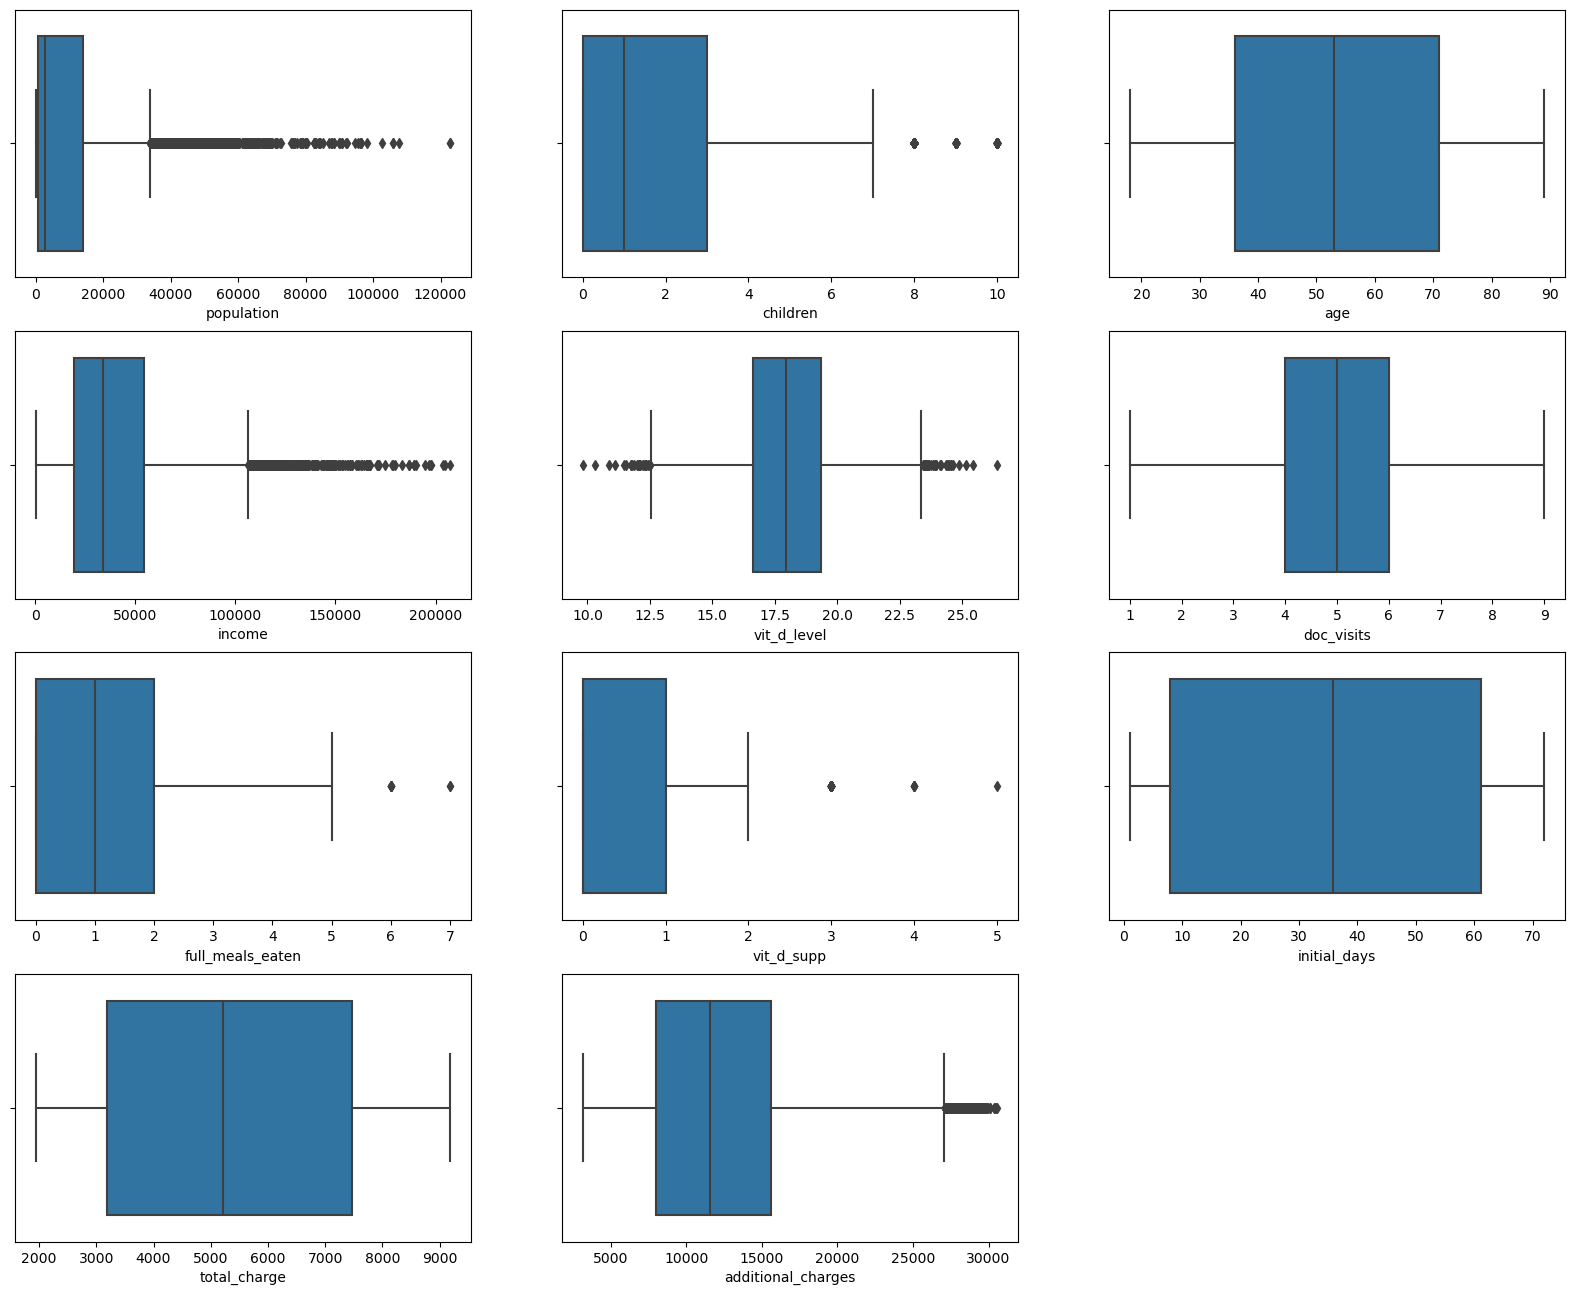

In [29]:
# Code borrowed from previous assignment (Yang, 2024).

#Check for outliers from continuous variables
fig, axes = plt.subplots(4, 3, figsize=(20,16))

sns.boxplot(data=df, x='population', ax=axes[0,0])
sns.boxplot(data=df, x='children', ax=axes[0,1])
sns.boxplot(data=df, x='age', ax=axes[0,2])
sns.boxplot(data=df, x='income', ax=axes[1,0])
sns.boxplot(data=df, x='vit_d_level', ax=axes[1,1])
sns.boxplot(data=df, x='doc_visits', ax=axes[1,2])
sns.boxplot(data=df, x='full_meals_eaten', ax=axes[2,0])
sns.boxplot(data=df, x='vit_d_supp', ax=axes[2,1])
sns.boxplot(data=df, x='initial_days', ax=axes[2,2])
sns.boxplot(data=df, x='total_charge', ax=axes[3,0])
sns.boxplot(data=df, x='additional_charges', ax=axes[3,1])
fig.delaxes(axes[3,2]);

In [30]:
#Express 'zip' variable as qualitative and re-fill missing leading zeroes
df.zip = df.zip.astype('str').str.zfill(5)

#Final check of data
df.head()

,case_order,customer_id,interaction,uid,city,state,county,zip,latitude,longitude,population,area,timezone,job,children,age,income,marital,gender,readmission,vit_d_level,doc_visits,full_meals_eaten,vit_d_supp,soft_drink,initial_admin,high_blood,stroke,complication_risk,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services,initial_days,total_charge,additional_charges,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


<BR>

## C2. Summary Statitistics <a class="anchor" id="C2"></a>

The predictor variables for the initial model will only include a subset of all the available variables in the data set, as not all variables are relevant to the proposed research question. Such irrelevant information consists of unique patient identifiers and most patient demographic information. Survey responses were also left out as they do not pertain to the scope of the research question. The initial variables were chosen based on my domain knowledge as a previous healthcare professional and my intuition of how the explanatory variables would affect the response variable. Below are the variables selected for the initial model, with a short description of why they were chosen and their descriptive statistics.

* `Initial_days`: the dependent (response) variable of interest.

The variable has a minimum of 1.00 day and a maximum of 71.98 days, with a range of 70.98 days. There is also a mean of 34.46 days and a median of 35.84 days, possibly indicating a normal distribution as both of these values are close to each other, but a visual would need to be used to verify this.

In [35]:
df.initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: initial_days, dtype: float64

* `Age`: this was chosen because it is intuitive to think that as age increases, patients would need to spend more time hospitlized.

There is a minimum age of 18 and a maximum age of 89, with a range of 71. This would indicate that there are no children within this data set. The mean age is 53.51 and the median age is 53.

In [37]:
df.age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: age, dtype: float64

* `Income`: this was chosen because it is intuitive to believe that those with higher income would be better prepared to deal with health consequences and thus would require less time in the hospital due to having an overall better health status.

There is a minimum income of 154.08 and a maximum income of 207249.10, with a range of 207095.02. The mean income is 40490.50 and the median income is 33768.42.

In [39]:
df.income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: income, dtype: float64

* `Doc_visits`: this was chosen because it is logical to believe that the patients who stay longer in the hospital would receive more doctor visits.

There is a minimum doctor visit of 1 and a maximum visit of 9, with a range of 8 visits. The mean visits is 5.01 and the median number of visits is 5.

In [41]:
df.doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: doc_visits, dtype: float64

* `Full_meals_eaten`: this was chosen because it is logical to believe that the patients who stay longer in the hospital would eat more meals.

The minimum number of meals eaten is 0 and the maximum is 7, with a range of 7. The mean number of meals eaten is 1.00 and the median number of meals eaten is 1.

In [43]:
df.full_meals_eaten.describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: full_meals_eaten, dtype: float64

* `Total_charge`: this was chosen because it is logical to believe that the patients who stay longer in the hospital would incur higher charges. Also noted from the data dictionary is that this is the average daily total charge.

The minimum total charge is 1938.31 and the maximum total charge is 9180.73, with a range of 7242.42. The mean total charge is 5312.17 and the median total charge is 5213.95.

In [45]:
df.total_charge.describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: total_charge, dtype: float64

* `Initial_admin`: this was chosen as the type of admission could determine how long a patient is admitted for.

The largest reason for a patient's initial admission was due to emergencies, making up 50.6% of the initial admissions. This is followed by elective admissions, at 25.04%, and then observation admissions, which were the least prevalent, at 24.36%.

In [47]:
df.initial_admin.value_counts()

initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

* `Complication_risk`: this was chosen as the assessed risk level of a patient could determine how long they are admitted for.

The most assessed complication risk was at a medium level, making of 45.17% of patients. This is followed by high complication risk, at 33.58%, and then low complication risk, at 21.25%.

In [49]:
df.complication_risk.value_counts()

complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

* `High_blood`: this was chosen as it is a medical condition that may affect the length of the hospital stay.

Most patients did not have high blood pressure, which was at a level of 59.1%.

In [51]:
df.high_blood.value_counts()

high_blood
No     5910
Yes    4090
Name: count, dtype: int64

* `Stroke`: this was chosen as it is a medical condition that may affect the length of the hospital stay.

Most patients did not have a condition of stroke, which was at a level of 80.07%.

In [53]:
df.stroke.value_counts()

stroke
No     8007
Yes    1993
Name: count, dtype: int64

* `Arthritis`: this was chosen as it is a medical condition that may affect the length of the hospital stay.

Most patients did not have arthritis, which was at a level of 64.26%.

In [55]:
df.arthritis.value_counts()

arthritis
No     6426
Yes    3574
Name: count, dtype: int64

* `Diabetes`: this was chosen as it is a medical condition that may affect the length of the hospital stay.

Most patients did not have diabetes, which was at a level of 72.62%.

In [57]:
df.diabetes.value_counts()

diabetes
No     7262
Yes    2738
Name: count, dtype: int64

* `Hyperlipidemia`: this was chosen as it is a medical condition that may affect the length of the hospital stay.

Most patients did not have hyperlipidemia, which was at a level of 66.28%.

In [59]:
df.hyperlipidemia.value_counts()

hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

* `Back_pain`: this was chosen as it is a medical condition that may affect the length of the hospital stay.

Most patients did not have back pain, which was at a level of 58.86%.

In [61]:
df.back_pain.value_counts()

back_pain
No     5886
Yes    4114
Name: count, dtype: int64

<BR>

## C3. Visualizations <a class="anchor" id="C3"></a>

* `Initial_days`

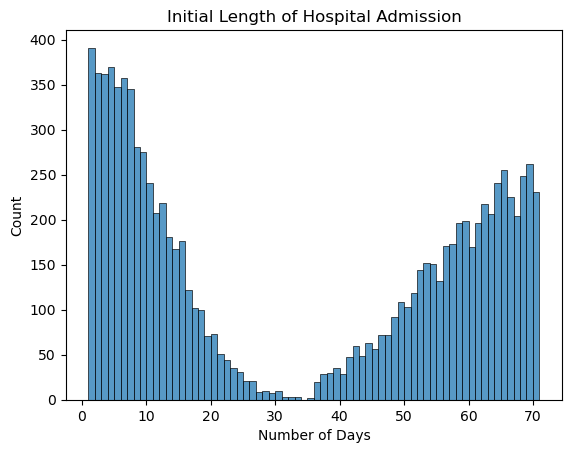

In [65]:
#Univariate visualization
sns.histplot(x='initial_days', bins=np.arange(1, 72), data=df)
plt.title('Initial Length of Hospital Admission')
plt.xlabel('Number of Days');

* `Age`

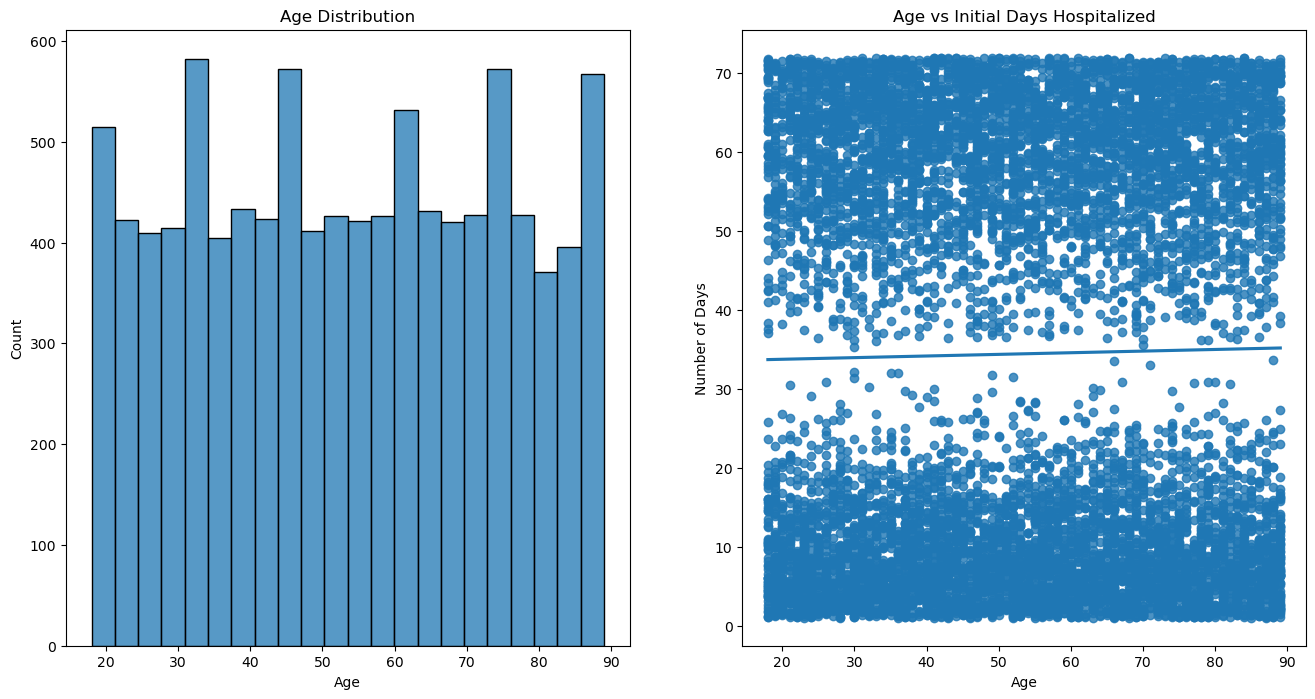

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Univariate visualization
sns.histplot(data=df, x='age', ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

#Bivariate visualization
sns.regplot(data=df, x='age', y='initial_days', ci=None, ax=ax[1])
ax[1].set_title('Age vs Initial Days Hospitalized')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of Days');

* `Income`

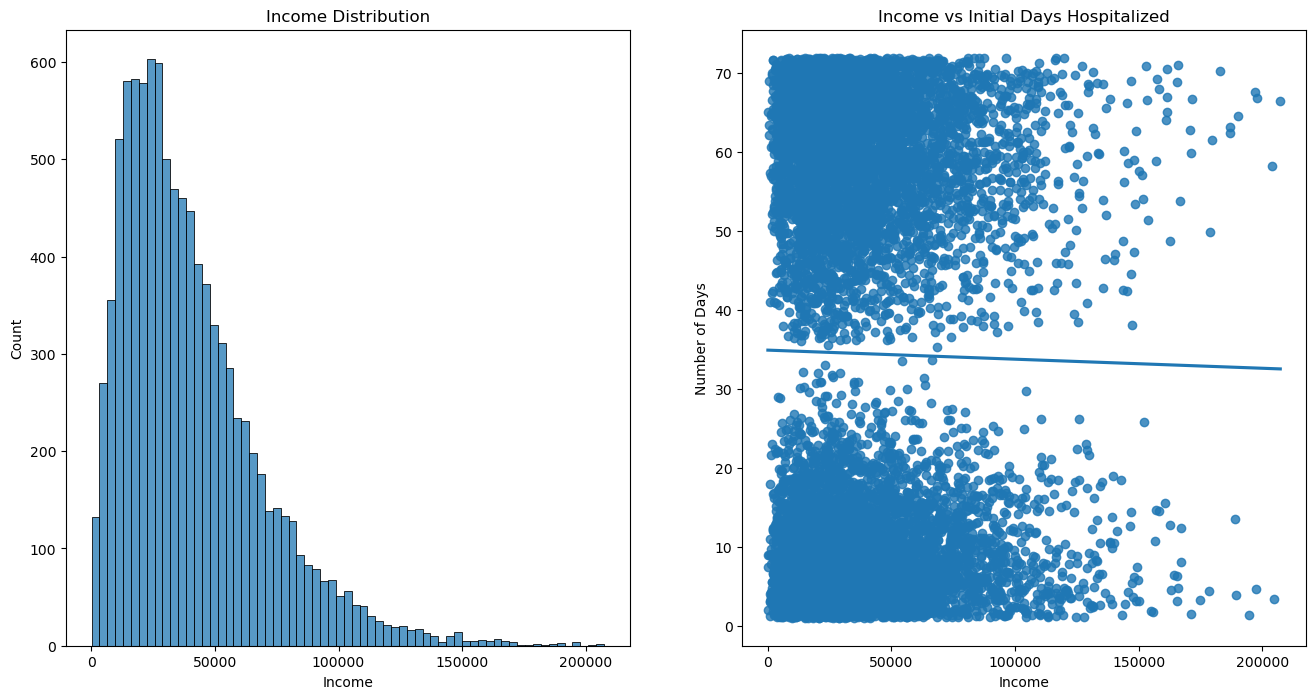

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Univariate visualization
sns.histplot(data=df, x='income', ax=ax[0])
ax[0].set_title('Income Distribution')
ax[0].set_xlabel('Income')

#Bivariate visualization
sns.regplot(data=df, x='income', y='initial_days', ci=None, ax=ax[1])
ax[1].set_title('Income vs Initial Days Hospitalized')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Number of Days');

* `Doc_visits`

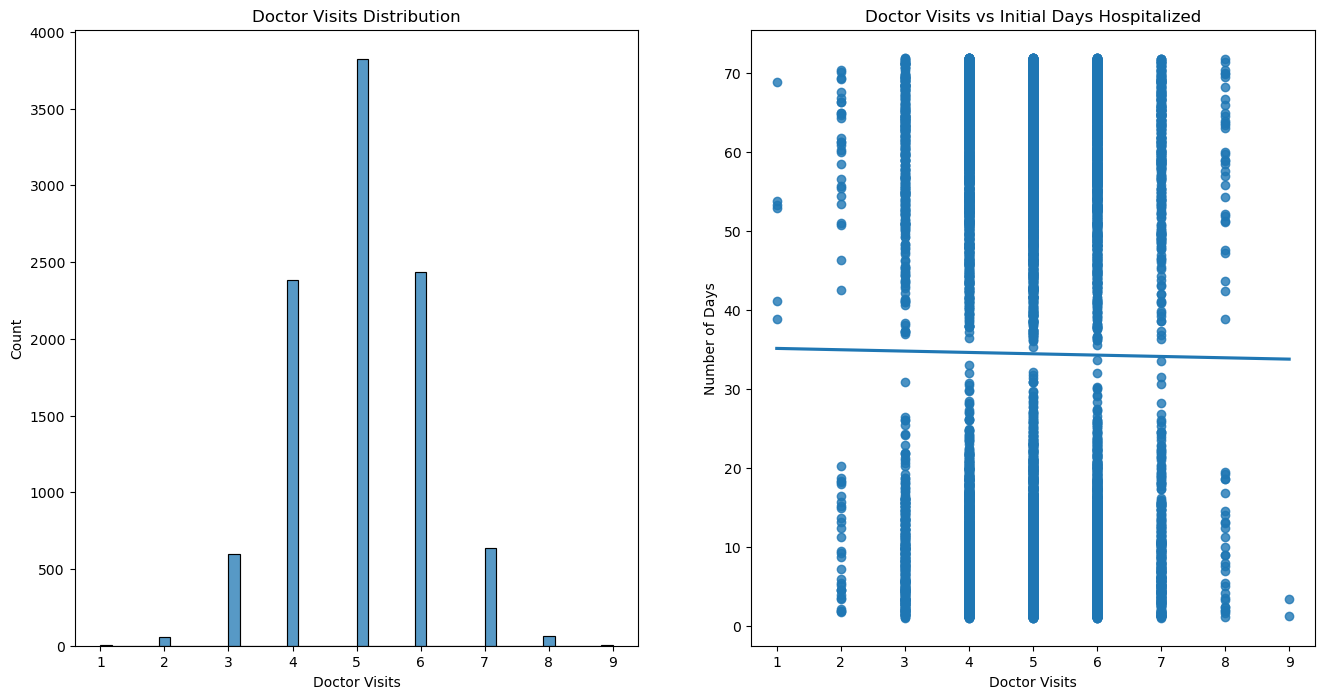

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Univariate visualization
sns.histplot(data=df, x='doc_visits', ax=ax[0])
ax[0].set_title('Doctor Visits Distribution')
ax[0].set_xlabel('Doctor Visits')

#Bivariate visualization
sns.regplot(data=df, x='doc_visits', y='initial_days', ci=None, ax=ax[1])
ax[1].set_title('Doctor Visits vs Initial Days Hospitalized')
ax[1].set_xlabel('Doctor Visits')
ax[1].set_ylabel('Number of Days');

* `Full_meals_eaten`

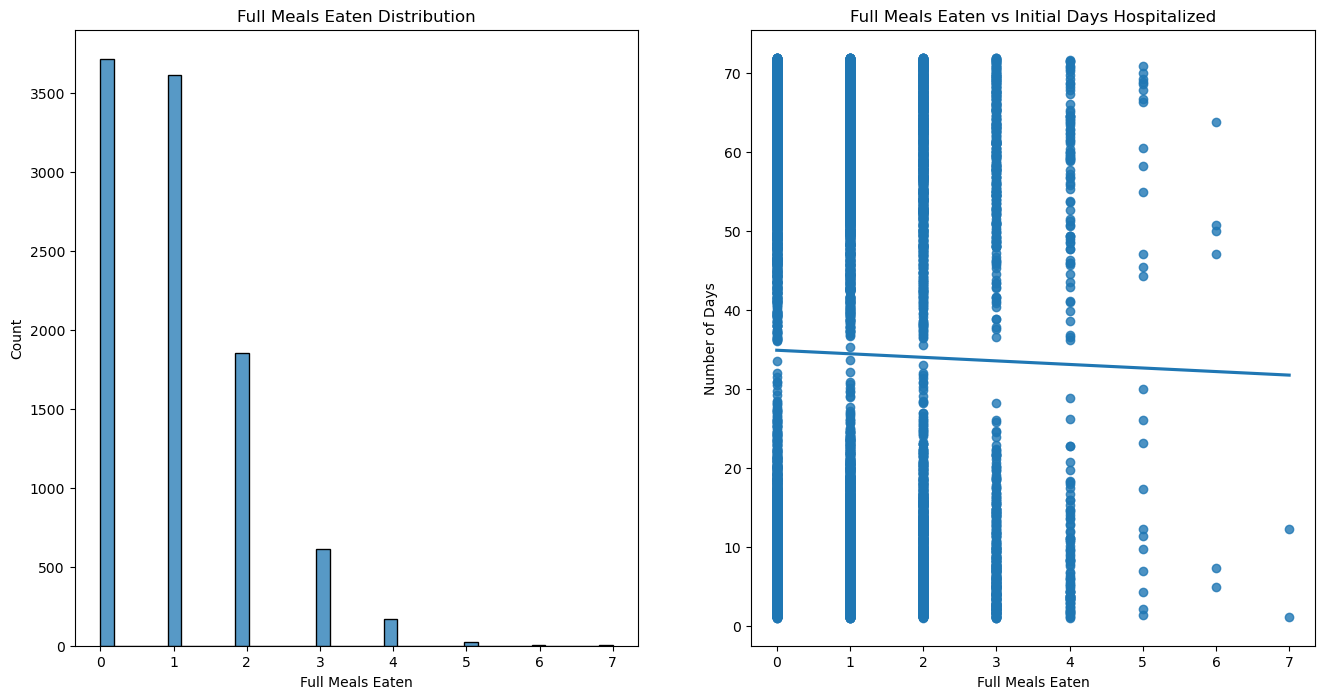

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Univariate visualization
sns.histplot(data=df, x='full_meals_eaten', ax=ax[0])
ax[0].set_title('Full Meals Eaten Distribution')
ax[0].set_xlabel('Full Meals Eaten')

#Bivariate visualization
sns.regplot(data=df, x='full_meals_eaten', y='initial_days', ci=None, ax=ax[1])
ax[1].set_title('Full Meals Eaten vs Initial Days Hospitalized')
ax[1].set_xlabel('Full Meals Eaten')
ax[1].set_ylabel('Number of Days');

* `Total_charge`

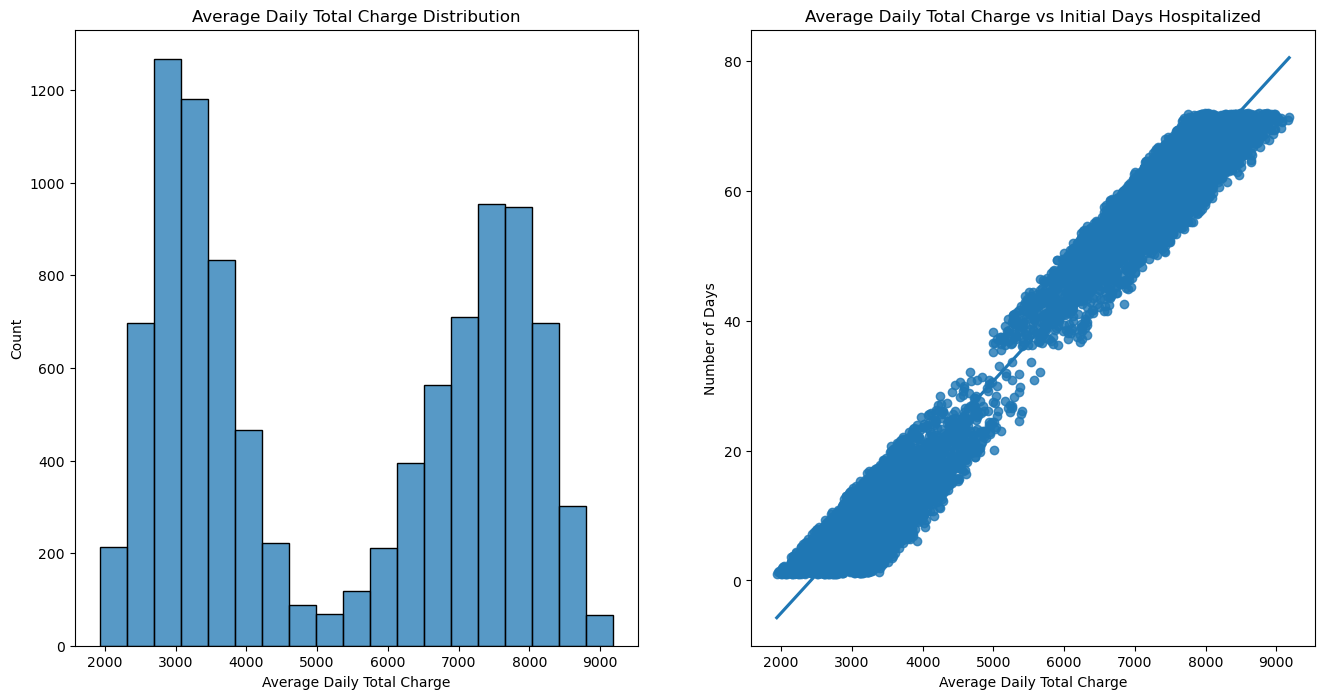

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Univariate visualization
sns.histplot(data=df, x='total_charge', ax=ax[0])
ax[0].set_title('Average Daily Total Charge Distribution')
ax[0].set_xlabel('Average Daily Total Charge')

#Bivariate visualization
sns.regplot(data=df, x='total_charge', y='initial_days', ci=None, ax=ax[1])
ax[1].set_title('Average Daily Total Charge vs Initial Days Hospitalized')
ax[1].set_xlabel('Average Daily Total Charge')
ax[1].set_ylabel('Number of Days');

* `Initial_admin`

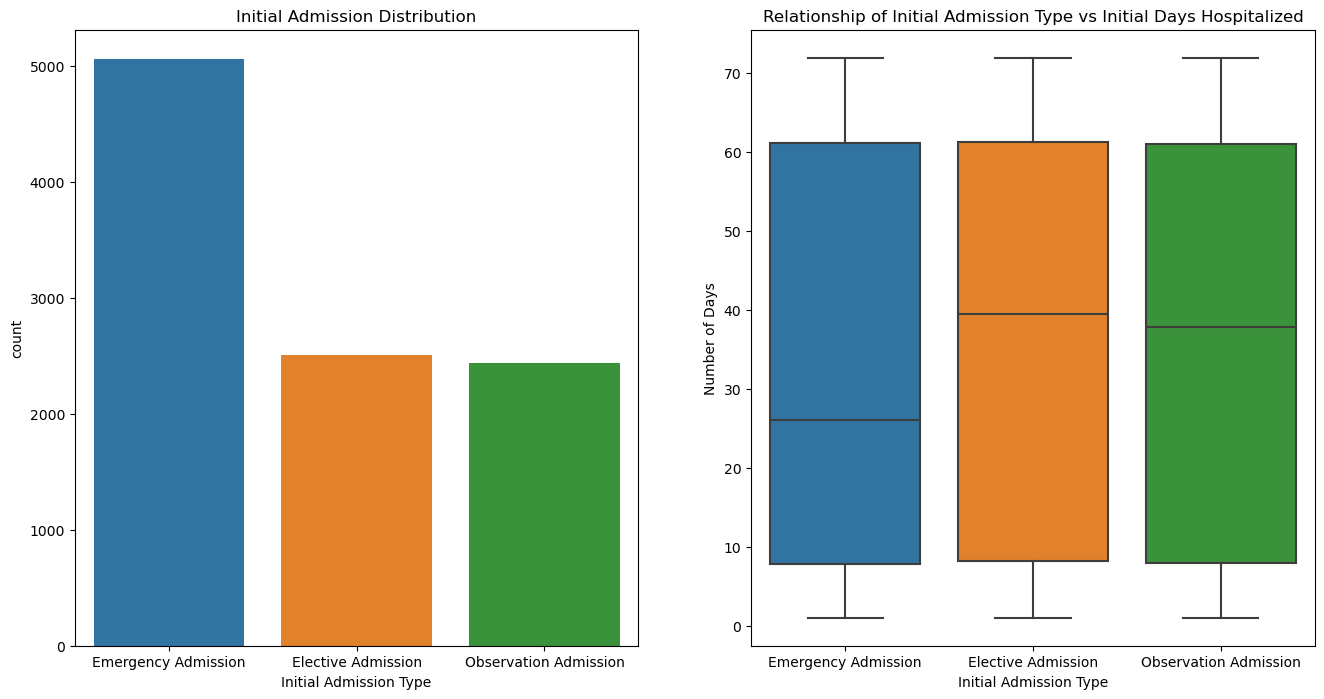

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Univariate visualization
sns.countplot(data=df, x='initial_admin', ax=ax[0])
ax[0].set_title('Initial Admission Distribution')
ax[0].set_xlabel('Initial Admission Type')

#Bivariate visualization
sns.boxplot(data=df, x='initial_admin', y='initial_days')
ax[1].set_title('Relationship of Initial Admission Type vs Initial Days Hospitalized')
ax[1].set_xlabel('Initial Admission Type')
ax[1].set_ylabel('Number of Days');

* `Complication_risk`

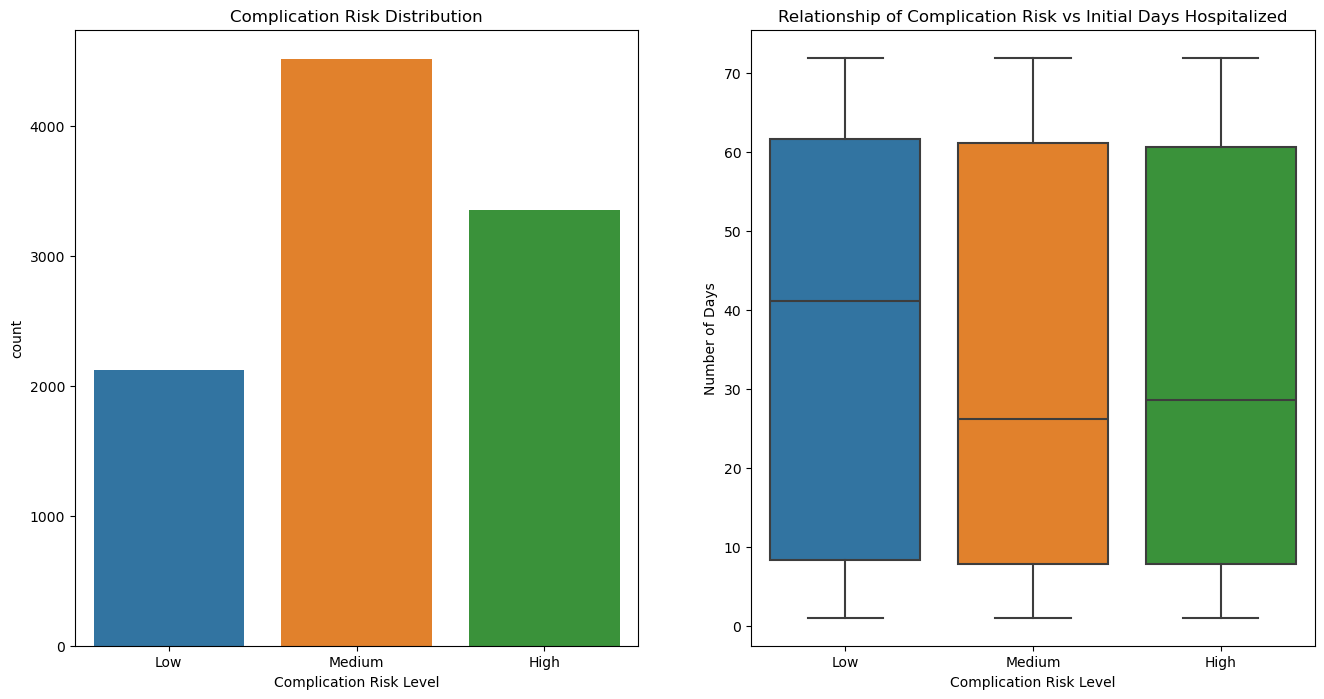

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Univariate visualization
sns.countplot(data=df, x='complication_risk', order=['Low', 'Medium', 'High'], ax=ax[0])
ax[0].set_title('Complication Risk Distribution')
ax[0].set_xlabel('Complication Risk Level')

#Bivariate visualization
sns.boxplot(data=df, x='complication_risk', y='initial_days',  order=['Low', 'Medium', 'High'])
ax[1].set_title('Relationship of Complication Risk vs Initial Days Hospitalized')
ax[1].set_xlabel('Complication Risk Level')
ax[1].set_ylabel('Number of Days');

* `High_blood`

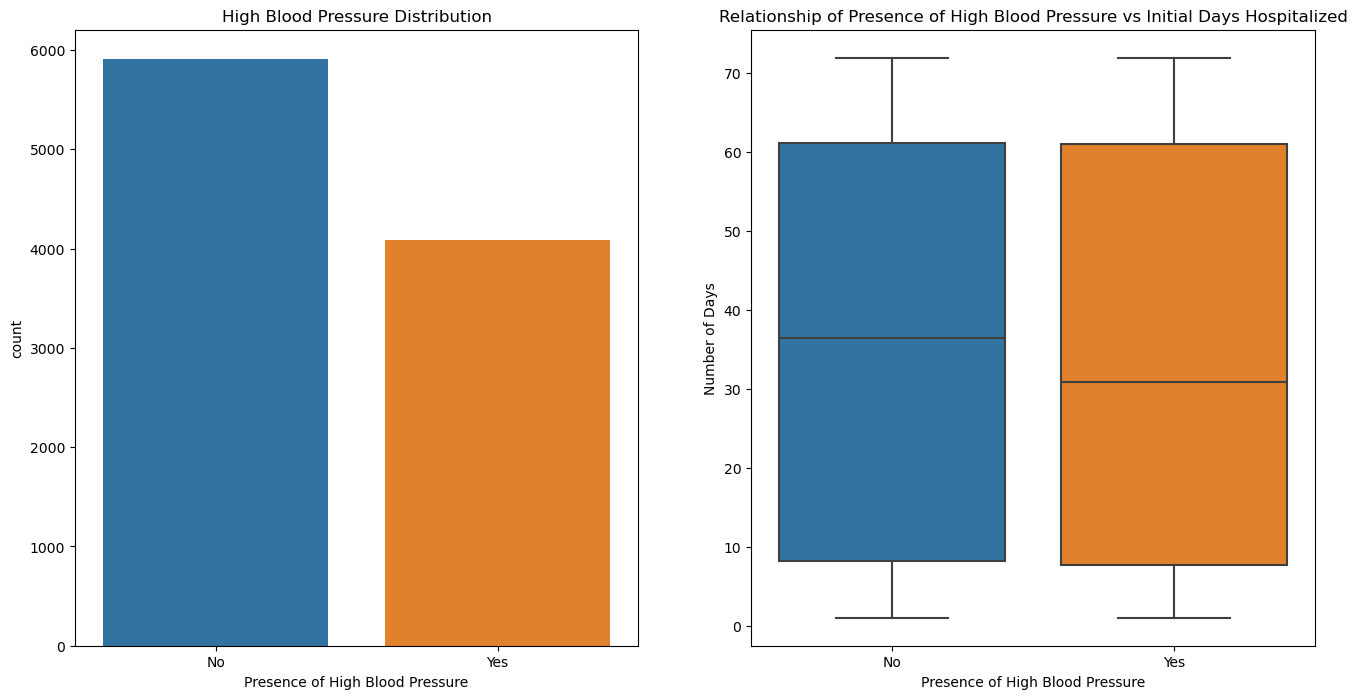

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Univariate visualization
sns.countplot(data=df, x='high_blood', order=['No','Yes'], ax=ax[0])
ax[0].set_title('High Blood Pressure Distribution')
ax[0].set_xlabel('Presence of High Blood Pressure')

#Bivariate visualization
sns.boxplot(data=df, x='high_blood', y='initial_days', order=['No','Yes'])
ax[1].set_title('Relationship of Presence of High Blood Pressure vs Initial Days Hospitalized')
ax[1].set_xlabel('Presence of High Blood Pressure')
ax[1].set_ylabel('Number of Days');

* `Stroke`

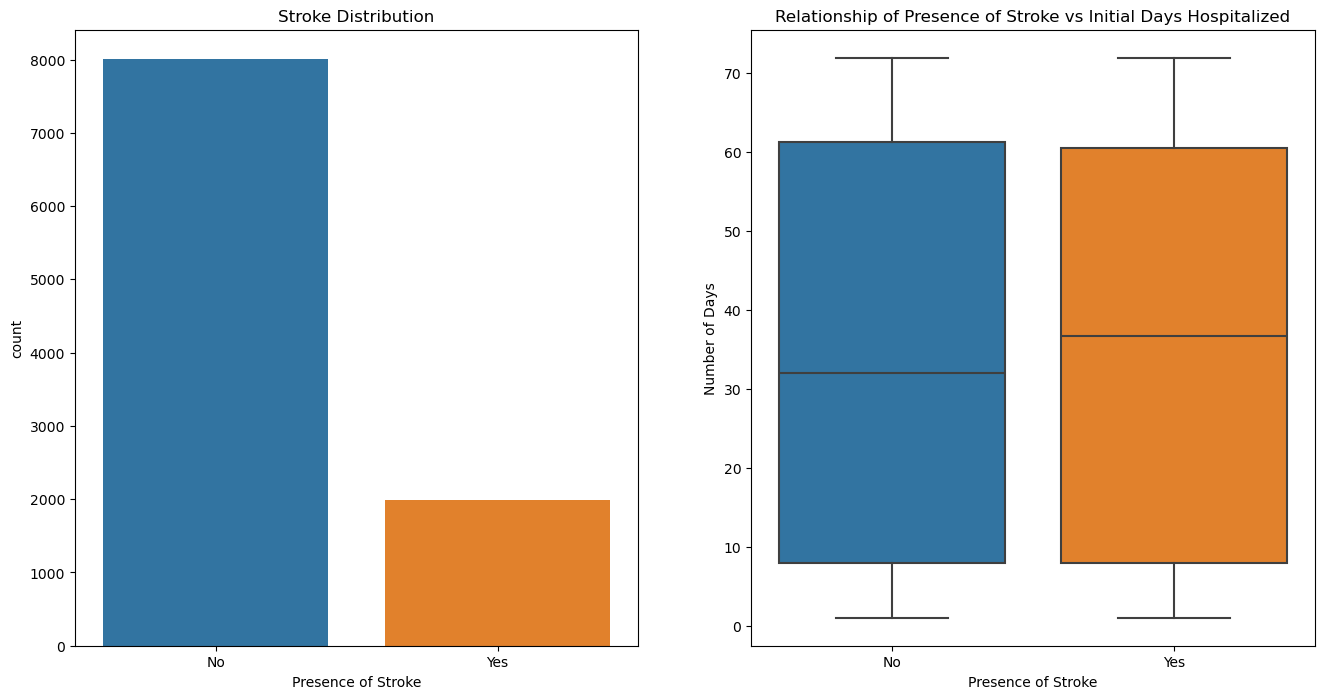

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Univariate visualization
sns.countplot(data=df, x='stroke', order=['No','Yes'], ax=ax[0])
ax[0].set_title('Stroke Distribution')
ax[0].set_xlabel('Presence of Stroke')

#Bivariate visualization
sns.boxplot(data=df, x='stroke', y='initial_days', order=['No','Yes'])
ax[1].set_title('Relationship of Presence of Stroke vs Initial Days Hospitalized')
ax[1].set_xlabel('Presence of Stroke')
ax[1].set_ylabel('Number of Days');

* `Arthritis`

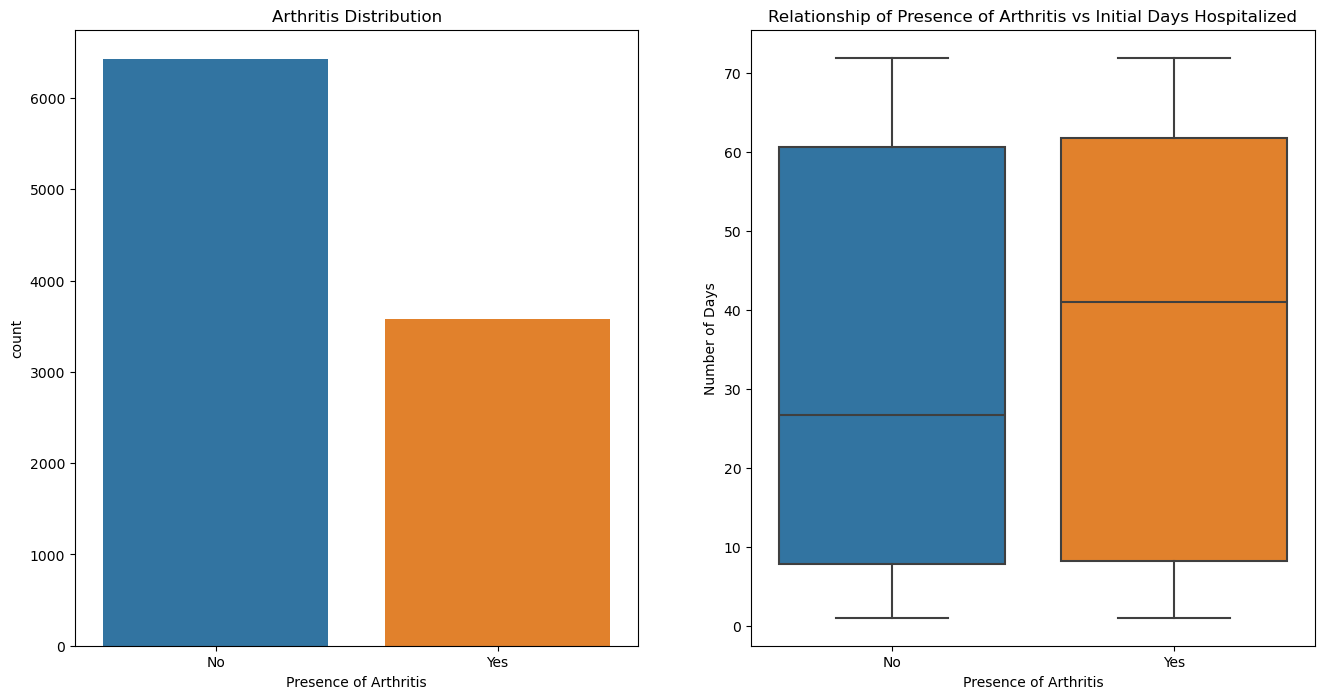

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Univariate visualization
sns.countplot(data=df, x='arthritis', order=['No','Yes'], ax=ax[0])
ax[0].set_title('Arthritis Distribution')
ax[0].set_xlabel('Presence of Arthritis')

#Bivariate visualization
sns.boxplot(data=df, x='arthritis', y='initial_days', order=['No','Yes'])
ax[1].set_title('Relationship of Presence of Arthritis vs Initial Days Hospitalized')
ax[1].set_xlabel('Presence of Arthritis')
ax[1].set_ylabel('Number of Days');

* `Diabetes`

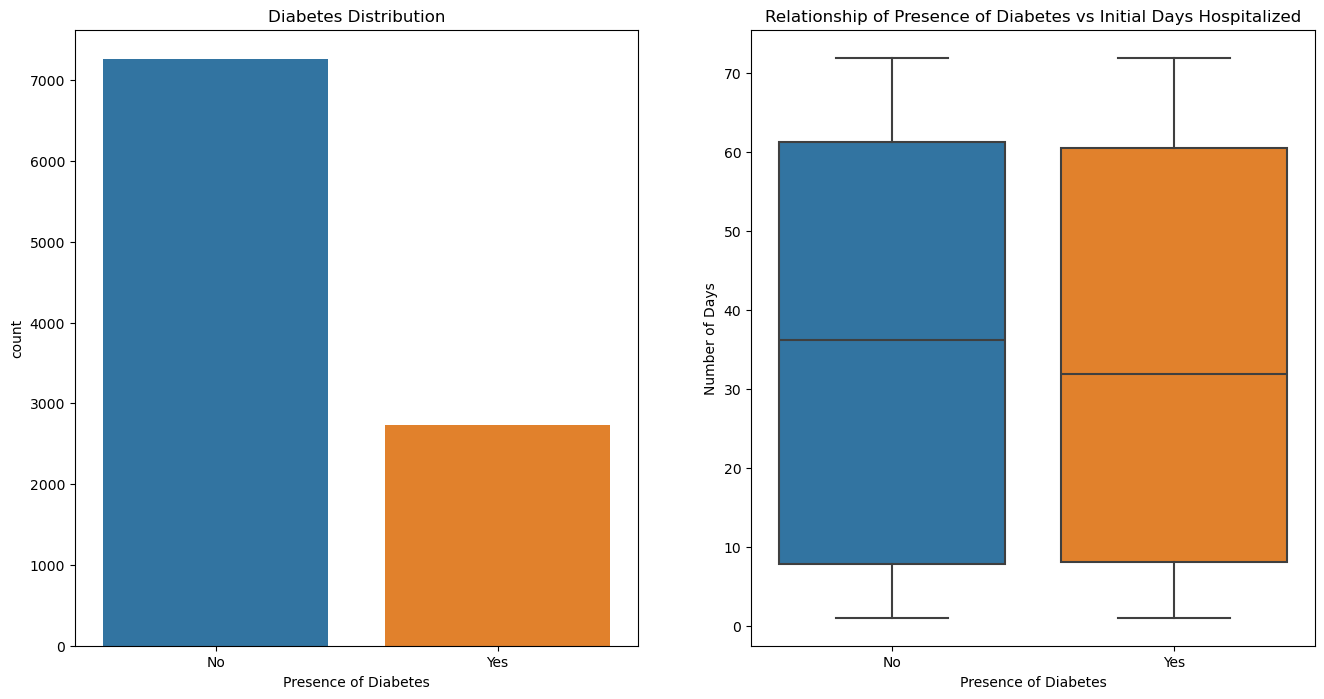

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Univariate visualization
sns.countplot(data=df, x='diabetes', order=['No','Yes'], ax=ax[0])
ax[0].set_title('Diabetes Distribution')
ax[0].set_xlabel('Presence of Diabetes')

#Bivariate visualization
sns.boxplot(data=df, x='diabetes', y='initial_days', order=['No','Yes'])
ax[1].set_title('Relationship of Presence of Diabetes vs Initial Days Hospitalized')
ax[1].set_xlabel('Presence of Diabetes')
ax[1].set_ylabel('Number of Days');

* `Hyperlipidemia`

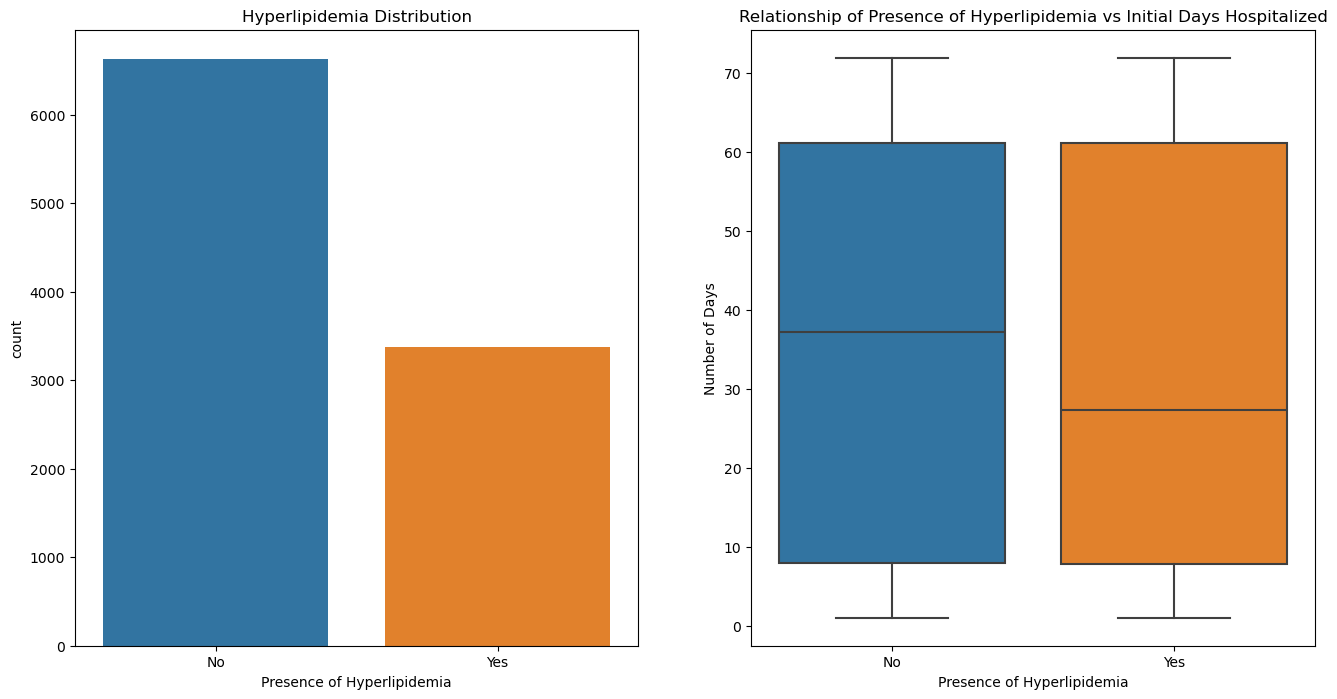

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Univariate visualization
sns.countplot(data=df, x='hyperlipidemia', order=['No','Yes'], ax=ax[0])
ax[0].set_title('Hyperlipidemia Distribution')
ax[0].set_xlabel('Presence of Hyperlipidemia')

#Bivariate visualization
sns.boxplot(data=df, x='hyperlipidemia', y='initial_days', order=['No','Yes'])
ax[1].set_title('Relationship of Presence of Hyperlipidemia vs Initial Days Hospitalized')
ax[1].set_xlabel('Presence of Hyperlipidemia')
ax[1].set_ylabel('Number of Days');

* `Back_pain`

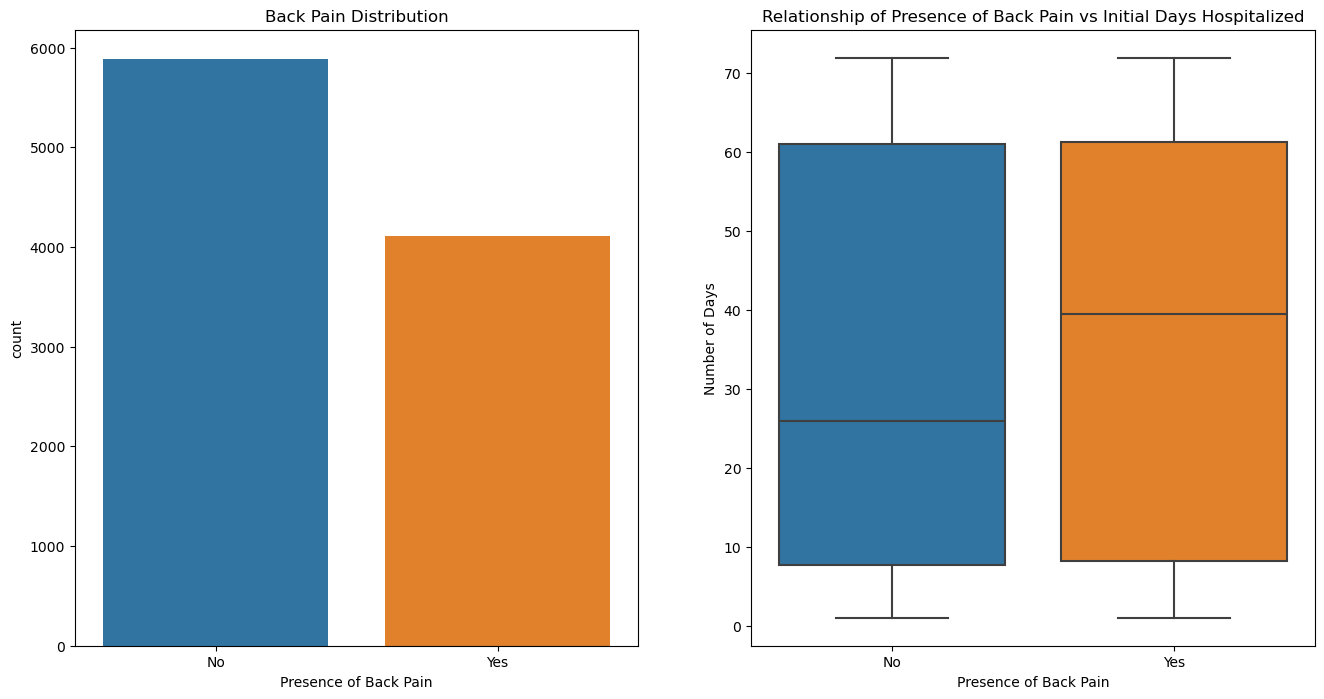

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Univariate visualization
sns.countplot(data=df, x='back_pain', order=['No','Yes'], ax=ax[0])
ax[0].set_title('Back Pain Distribution')
ax[0].set_xlabel('Presence of Back Pain')

#Bivariate visualization
sns.boxplot(data=df, x='back_pain', y='initial_days', order=['No','Yes'])
ax[1].set_title('Relationship of Presence of Back Pain vs Initial Days Hospitalized')
ax[1].set_xlabel('Presence of Back Pain')
ax[1].set_ylabel('Number of Days');

<BR>

## C4. Data Transformation <a class="anchor" id="C4"></a>

The linear regression model only takes numerical data, so all categorical variables must be transformed before establishing the initial model. This transformation will be completed using dummy variables in a k-1 convention to prevent multicollinearity issues during modeling. The values of the dummy variables were then replaced with 1/0's as the model only accepts numerical data types.

In [95]:
#Select continuous predictor variables
continuous = df[['age', 'income', 'doc_visits', 'full_meals_eaten', 'total_charge']]
#Select and create dummies, in k-1 fashion, for categorical variables
dummies = pd.get_dummies(df[['initial_admin', 'complication_risk', 'high_blood', 'stroke', 'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain']], drop_first=True).replace({True:1, False:0})
#Join both dataframes and re-format column names
X = pd.concat([continuous, dummies], axis=1)
X.columns = X.columns.str.lower().str.replace(' ', '_')

<BR>

## C5. Prepared Data Set <a class="anchor" id="C5"></a>

A file containing the prepared data set that is used for the linear regression model will be submitted alongside the report and is called "Task1_data.csv."

In [99]:
#Join transformed predictors dataframe and response variable and then create the csv file
transformed_df = pd.concat([X, df.initial_days], axis=1)
transformed_df.to_csv('Task1_data.csv', index=False)

<BR>

## D1. Initial Model <a class="anchor" id="D1"></a>

In [102]:
#Add a column containing a constant in order to generate a y-intercept and then run the model with the feature matrix (X) and target array (y)
X = sm.add_constant(X)
y = df['initial_days']
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.297e+05
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:55:12   Log-Likelihood:                -10675.
No. Observations:               10000   AIC:                         2.138e+04
Df Residuals:                    9984   BIC:                         2.150e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -28.5433      0.048   -591.092      0.000     -28.638     -28.449
age                                  2.842e-05      0.000      0.083      0.934      -0.001       0.001
income                              -2.095e-07   2.47e-07     -0.848      0.397   -6.94e-07    2.75e-07
doc_visits                              0.0016      0.007      0.243      0.808      -0.012       0.015
full_meals_eaten                       -0.0100      0.007     -1.430      0.153      -0.024       0.004
total_charge                            0.0122   3.27e-06   3730.680      0.000       0.012       0.012
initial_admin_emergency_admission      -6.2409      0.017   -361.134      0.000      -6.275      -6.207
initial_admin_observation_admission     0.0370      0.020      1.842      0.065      -0.002       0.076
complication_risk_low                   5.0383      0.020    257.496      0.000       5.000       5.077
complication_risk_medium                5.0510      0.016    313.349      0.000       5.019       5.083
high_blood_yes                         -1.3872      0.014    -96.756      0.000      -1.415      -1.359
stroke_yes                              0.0211      0.018      1.194      0.232      -0.014       0.056
arthritis_yes                          -0.9059      0.015    -61.559      0.000      -0.935      -0.877
diabetes_yes                           -0.9128      0.016    -57.760      0.000      -0.944      -0.882
hyperlipidemia_yes                     -1.1265      0.015    -75.546      0.000      -1.156      -1.097
back_pain_yes                          -1.0617      0.014    -74.063      0.000      -1.090      -1.034
==============================================================================
Omnibus:                      458.250   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.578
Skew:                          -0.367   Prob(JB):                     1.23e-76
Kurtosis:                       2.452   Cond. No.                     3.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
#Obtain residual standard error (RSE) value from initial model
results.resid.std(ddof=X.shape[1])

0.7042312240184839

## D2. Justification of Model Reduction <a class="anchor" id="D2"></a>

The initial model bodes well with an adjusted $R^{2}$ of 0.999 but can be reduced further due to containing predictors that are not statistically significant. This phenomenon can be seen with predictor variables whose corresponding p-values are greater than an alpha level set at 0.05. Such predictors from the initial model include age, income, doctor visits, and more. These predictors contribute to the model by chance as they contain higher p-values; thus, there is a need to reduce the model to only statistically significant predictors.

The feature selection method to reduce the model will use backward stepwise elimination. This method is iterative, removing the least significant predictor, the one with the highest p-value, one at a time. After each elimination step, the model will be rerun on the remaining predictors to determine the next least significant predictor. This process is iterative because relationships in the model may change as others are removed, so p-values constantly change.

As mentioned, the lack of multicollinearity amongst predictors is also an assumption of linear regression. This check was done by determining the variance inflation factor (VIF) score amongst predictors. A VIF score greater than 10 indicates high multicollinearity amongst predictors and suggests that such predictors should be removed to prevent further issues (The Investopedia Team, 2024). From the results of the VIF test, only `doc_visits` display high multicollinearity issues, so it was removed prior to the feature selection method performance.

In [106]:
#Determing VIF scores (GeeksforGeeks, 2024).
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Remove constant column prior to running VIF
X = X.drop(columns='const')

#Calculate VIF scores
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,6.689202
1,income,2.888237
2,doc_visits,12.434401
3,full_meals_eaten,1.945375
4,total_charge,6.217770
5,initial_admin_emergency_admission,2.928403
6,initial_admin_observation_admission,1.909110
7,complication_risk_low,1.586775
8,complication_risk_medium,2.245576
9,high_blood_yes,1.676662


In [107]:
#Remove doc_visits (VIF = 12.43)
X = X.drop(columns='doc_visits')

#Calculate VIF scores
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,5.658040
1,income,2.740901
2,full_meals_eaten,1.906469
3,total_charge,5.441227
4,initial_admin_emergency_admission,2.788823
5,initial_admin_observation_admission,1.822863
6,complication_risk_low,1.545892
7,complication_risk_medium,2.150986
8,high_blood_yes,1.655123
9,stroke_yes,1.237807


In [108]:
#Check model to decide which predictor to remove first based on p-values
X = sm.add_constant(X)
y = df['initial_days']
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.962e+05
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:55:12   Log-Likelihood:                -10675.
No. Observations:               10000   AIC:                         2.138e+04
Df Residuals:                    9985   BIC:                         2.149e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -28.5352      0.035   -821.411      0.000     -28.603     -28.467
age                                  2.903e-05      0.000      0.085      0.932      -0.001       0.001
income                              -2.087e-07   2.47e-07     -0.845      0.398   -6.93e-07    2.76e-07
full_meals_eaten                       -0.0100      0.007     -1.431      0.152      -0.024       0.004
total_charge                            0.0122   3.27e-06   3730.939      0.000       0.012       0.012
initial_admin_emergency_admission      -6.2408      0.017   -361.199      0.000      -6.275      -6.207
initial_admin_observation_admission     0.0371      0.020      1.848      0.065      -0.002       0.076
complication_risk_low                   5.0383      0.020    257.524      0.000       5.000       5.077
complication_risk_medium                5.0509      0.016    313.388      0.000       5.019       5.083
high_blood_yes                         -1.3871      0.014    -96.762      0.000      -1.415      -1.359
stroke_yes                              0.0211      0.018      1.194      0.233      -0.014       0.056
arthritis_yes                          -0.9059      0.015    -61.562      0.000      -0.935      -0.877
diabetes_yes                           -0.9127      0.016    -57.765      0.000      -0.944      -0.882
hyperlipidemia_yes                     -1.1266      0.015    -75.583      0.000      -1.156      -1.097
back_pain_yes                          -1.0617      0.014    -74.068      0.000      -1.090      -1.034
==============================================================================
Omnibus:                      458.388   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.532
Skew:                          -0.367   Prob(JB):                     1.26e-76
Kurtosis:                       2.452   Cond. No.                     2.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
#Backward Stepwise Elimination #1: remove age (p-value = 0.932)
X_reduced = X.drop('age',axis=1)
model = sm.OLS(y, X_reduced)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.073e+06
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:55:12   Log-Likelihood:                -10675.
No. Observations:               10000   AIC:                         2.138e+04
Df Residuals:                    9986   BIC:                         2.148e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -28.5336      0.030   -960.376      0.000     -28.592     -28.475
income                               -2.09e-07   2.47e-07     -0.846      0.398   -6.93e-07    2.75e-07
full_meals_eaten                       -0.0100      0.007     -1.431      0.153      -0.024       0.004
total_charge                            0.0122   3.27e-06   3731.585      0.000       0.012       0.012
initial_admin_emergency_admission      -6.2408      0.017   -361.248      0.000      -6.275      -6.207
initial_admin_observation_admission     0.0370      0.020      1.847      0.065      -0.002       0.076
complication_risk_low                   5.0383      0.020    257.537      0.000       5.000       5.077
complication_risk_medium                5.0509      0.016    313.406      0.000       5.019       5.082
high_blood_yes                         -1.3871      0.014    -96.768      0.000      -1.415      -1.359
stroke_yes                              0.0211      0.018      1.195      0.232      -0.013       0.056
arthritis_yes                          -0.9059      0.015    -61.566      0.000      -0.935      -0.877
diabetes_yes                           -0.9127      0.016    -57.768      0.000      -0.944      -0.882
hyperlipidemia_yes                     -1.1266      0.015    -75.587      0.000      -1.156      -1.097
back_pain_yes                          -1.0616      0.014    -74.086      0.000      -1.090      -1.034
==============================================================================
Omnibus:                      458.358   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.542
Skew:                          -0.367   Prob(JB):                     1.25e-76
Kurtosis:                       2.452   Cond. No.                     2.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
#Backward Stepwise Elimination #2: remove income (p-value = 0.398)
X_reduced = X_reduced.drop('income',axis=1)
model = sm.OLS(y, X_reduced)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.162e+06
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:55:12   Log-Likelihood:                -10675.
No. Observations:               10000   AIC:                         2.138e+04
Df Residuals:                    9987   BIC:                         2.147e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -28.5424      0.028  -1024.773      0.000     -28.597     -28.488
full_meals_eaten                       -0.0099      0.007     -1.421      0.155      -0.024       0.004
total_charge                            0.0122   3.27e-06   3731.956      0.000       0.012       0.012
initial_admin_emergency_admission      -6.2407      0.017   -361.264      0.000      -6.275      -6.207
initial_admin_observation_admission     0.0368      0.020      1.838      0.066      -0.002       0.076
complication_risk_low                   5.0382      0.020    257.539      0.000       5.000       5.077
complication_risk_medium                5.0510      0.016    313.424      0.000       5.019       5.083
high_blood_yes                         -1.3871      0.014    -96.769      0.000      -1.415      -1.359
stroke_yes                              0.0210      0.018      1.193      0.233      -0.014       0.056
arthritis_yes                          -0.9058      0.015    -61.563      0.000      -0.935      -0.877
diabetes_yes                           -0.9126      0.016    -57.763      0.000      -0.944      -0.882
hyperlipidemia_yes                     -1.1268      0.015    -75.600      0.000      -1.156      -1.098
back_pain_yes                          -1.0617      0.014    -74.099      0.000      -1.090      -1.034
==============================================================================
Omnibus:                      458.481   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.467
Skew:                          -0.367   Prob(JB):                     1.30e-76
Kurtosis:                       2.452   Cond. No.                     2.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
#Backward Stepwise Elimination #3: remove stroke_yes (p-value = 0.233)
X_reduced = X_reduced.drop('stroke_yes',axis=1)
model = sm.OLS(y, X_reduced)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.268e+06
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:55:12   Log-Likelihood:                -10676.
No. Observations:               10000   AIC:                         2.138e+04
Df Residuals:                    9988   BIC:                         2.146e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -28.5380      0.028  -1033.649      0.000     -28.592     -28.484
full_meals_eaten                       -0.0099      0.007     -1.418      0.156      -0.024       0.004
total_charge                            0.0122   3.27e-06   3731.883      0.000       0.012       0.012
initial_admin_emergency_admission      -6.2408      0.017   -361.276      0.000      -6.275      -6.207
initial_admin_observation_admission     0.0368      0.020      1.837      0.066      -0.002       0.076
complication_risk_low                   5.0382      0.020    257.533      0.000       5.000       5.077
complication_risk_medium                5.0510      0.016    313.418      0.000       5.019       5.083
high_blood_yes                         -1.3870      0.014    -96.761      0.000      -1.415      -1.359
arthritis_yes                          -0.9061      0.015    -61.595      0.000      -0.935      -0.877
diabetes_yes                           -0.9124      0.016    -57.756      0.000      -0.943      -0.881
hyperlipidemia_yes                     -1.1270      0.015    -75.624      0.000      -1.156      -1.098
back_pain_yes                          -1.0617      0.014    -74.093      0.000      -1.090      -1.034
==============================================================================
Omnibus:                      457.769   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.929
Skew:                          -0.366   Prob(JB):                     1.70e-76
Kurtosis:                       2.452   Cond. No.                     2.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
#Backward Stepwise Elimination #4: remove full_meals_eaten (p-value = 0.156)
X_reduced = X_reduced.drop('full_meals_eaten',axis=1)
model = sm.OLS(y, X_reduced)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.395e+06
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:55:12   Log-Likelihood:                -10677.
No. Observations:               10000   AIC:                         2.138e+04
Df Residuals:                    9989   BIC:                         2.146e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -28.5482      0.027  -1070.682      0.000     -28.600     -28.496
total_charge                            0.0122   3.27e-06   3732.221      0.000       0.012       0.012
initial_admin_emergency_admission      -6.2411      0.017   -361.304      0.000      -6.275      -6.207
initial_admin_observation_admission     0.0365      0.020      1.823      0.068      -0.003       0.076
complication_risk_low                   5.0387      0.020    257.576      0.000       5.000       5.077
complication_risk_medium                5.0513      0.016    313.442      0.000       5.020       5.083
high_blood_yes                         -1.3873      0.014    -96.787      0.000      -1.415      -1.359
arthritis_yes                          -0.9064      0.015    -61.613      0.000      -0.935      -0.878
diabetes_yes                           -0.9127      0.016    -57.769      0.000      -0.944      -0.882
hyperlipidemia_yes                     -1.1270      0.015    -75.622      0.000      -1.156      -1.098
back_pain_yes                          -1.0614      0.014    -74.077      0.000      -1.089      -1.033
==============================================================================
Omnibus:                      458.306   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.404
Skew:                          -0.367   Prob(JB):                     1.34e-76
Kurtosis:                       2.452   Cond. No.                     2.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
#Backward Stepwise Elimination #5: remove initial_admin_observation_admission (p-value = 0.068)
X_reduced = X_reduced.drop('initial_admin_observation_admission',axis=1)
model = sm.OLS(y, X_reduced)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.549e+06
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:55:12   Log-Likelihood:                -10679.
No. Observations:               10000   AIC:                         2.138e+04
Df Residuals:                    9990   BIC:                         2.145e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -28.5306      0.025  -1147.040      0.000     -28.579     -28.482
total_charge                          0.0122   3.27e-06   3731.823      0.000       0.012       0.012
initial_admin_emergency_admission    -6.2591      0.014   -441.657      0.000      -6.287      -6.231
complication_risk_low                 5.0392      0.020    257.610      0.000       5.001       5.078
complication_risk_medium              5.0520      0.016    313.558      0.000       5.020       5.084
high_blood_yes                       -1.3871      0.014    -96.766      0.000      -1.415      -1.359
arthritis_yes                        -0.9064      0.015    -61.606      0.000      -0.935      -0.878
diabetes_yes                         -0.9128      0.016    -57.773      0.000      -0.944      -0.882
hyperlipidemia_yes                   -1.1270      0.015    -75.609      0.000      -1.156      -1.098
back_pain_yes                        -1.0611      0.014    -74.051      0.000      -1.089      -1.033
==============================================================================
Omnibus:                      457.021   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.720
Skew:                          -0.368   Prob(JB):                     1.15e-76
Kurtosis:                       2.453   Cond. No.                     2.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<BR>

## D3. Reduced Linear Regression Model <a class="anchor" id="D3"></a>

In [116]:
#Final Reduced model
model = sm.OLS(y, X_reduced)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           initial_days   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.549e+06
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:55:12   Log-Likelihood:                -10679.
No. Observations:               10000   AIC:                         2.138e+04
Df Residuals:                    9990   BIC:                         2.145e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -28.5306      0.025  -1147.040      0.000     -28.579     -28.482
total_charge                          0.0122   3.27e-06   3731.823      0.000       0.012       0.012
initial_admin_emergency_admission    -6.2591      0.014   -441.657      0.000      -6.287      -6.231
complication_risk_low                 5.0392      0.020    257.610      0.000       5.001       5.078
complication_risk_medium              5.0520      0.016    313.558      0.000       5.020       5.084
high_blood_yes                       -1.3871      0.014    -96.766      0.000      -1.415      -1.359
arthritis_yes                        -0.9064      0.015    -61.606      0.000      -0.935      -0.878
diabetes_yes                         -0.9128      0.016    -57.773      0.000      -0.944      -0.882
hyperlipidemia_yes                   -1.1270      0.015    -75.609      0.000      -1.156      -1.098
back_pain_yes                        -1.0611      0.014    -74.051      0.000      -1.089      -1.033
==============================================================================
Omnibus:                      457.021   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.720
Skew:                          -0.368   Prob(JB):                     1.15e-76
Kurtosis:                       2.453   Cond. No.                     2.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<BR>

## E1. Model Comparison <a class="anchor" id="E1"></a>

Both models are seen to be statistically meaningful upon inspection. This can be seen from each model's probability of the F-statistic being calculated to be 0.00, which is smaller than an alpha level set at 0.05. When comparing model evaluation statistics between the models, both have an adjusted $R^{2}$ of 0.999 and a residual standard error (RSE) of 0.704. Although both models display similar statistics, the reduced model is a better fit than the original model. This reasoning is because the model contains less predictors, so it is less complex and will also perform faster. Additionally, a less complex model prevents overfitting, and would allow the model to better generalize when looking at new data.

<BR>

## E2. Output and Calculations <a class="anchor" id="E2"></a>

Below is the Q-Q plot of the reduced model's residuals. The residuals do not follow the diagonal line, indicating that they are not normally distributed. Instead, the residuals present as more of a sigmoid shape. This violates the assumption of multivariate normality. This violation could be adjusted by transforming the response variable. Again, the RSE is included, which has a value of 0.704.

A Breusch-Pagan Test for Heteroscedasticity is also used. The outcome of this test determines the presence of heteroscedasticity. The null hypothesis of this test states that homoscedasticity is present. The alternative hypothesis states that no homoscedasticity is present (i.e., there is heteroscedasticity). From the test output and using an alpha set at 0.05, we can see that the p-value is 0.82, thus indicating that we cannot reject the null hypothesis. This result shows that homoscedasticity is present.

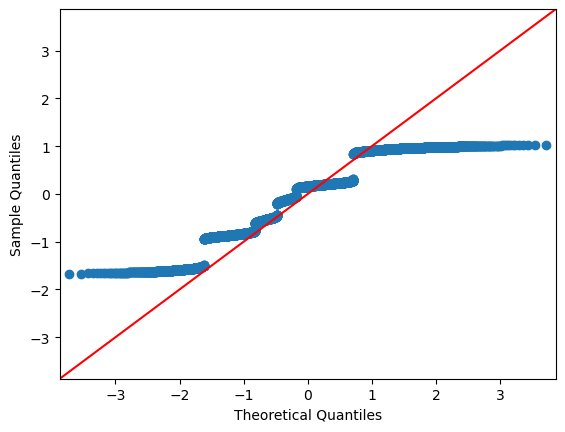

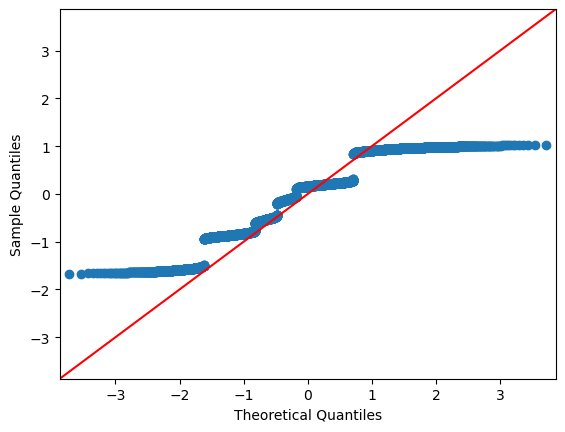

In [123]:
sm.qqplot(results.resid, line='45')

In [124]:
#Obtain residual standard error (RSE) value from reduced model
results.resid.std(ddof=X_reduced.shape[1])

0.7042853717784089

In [125]:
#Breusch-Pagan Test for Heteroscedasticity (GeeksforGeeks, 2022).
from statsmodels.stats.diagnostic import het_breuschpagan
_, p_value, _, _ = het_breuschpagan(results.resid, results.model.exog)
print(p_value)

0.8264469738768664


<BR>

## E3. Code <a class="anchor" id="E3"></a>

Attached is a file containing all code used, named as "D208_Task_1_Leng_Yang.ipynb."

<BR>

## F1. Results <a class="anchor" id="F1"></a>

**Regression Equation**  
Below is the equation generated from the reduced multiple linear regression model:

$\hat{y}=-28.53+0.01(\text{average daily total charge})-6.26(\text{emergency admission})+5.04(\text{low complication risk})+5.05(\text{medium complication risk})-1.39(\text{high blood pressure})-0.91(\text{arthritis})-0.91(\text{diabetes})-1.13(\text{hyperlipidemia})-1.06(\text{back pain})$

The coefficients can be interpreted like so:
* The constant represents the estimated value of the initial days hospitalized when the predictors are zero or absent.
* Keeping everything constant, one unit increase in the average daily total charge is associated with an 0.01 day increase in the initial days hospitalized.
* Keeping everything constant, patients admitted for emergencies spend 6.26 fewer days hospitalized than other admission types.
* Keeping everything constant, patients with a low complication risk spend 5.04 more days hospitalized than those with a high complication risk.
* Keeping everything constant, patients with a medium complication risk spend 5.05 more days hospitalized than those with a high complication risk.
* Keeping everything constant, patients with high blood pressure spend 1.39 fewer days hospitalized than those without.
* Keeping everything constant, patients who have arthritis spend 0.91 fewer days hospitalized than those who don't.
* Keeping everything constant, patients who have diabetes spend 0.91 fewer days hospitalized than those who don't.
* Keeping everything constant, patients who have hyperlipidemia spend 1.13 fewer days hospitalized than those who don't.
* Keeping everything constant, patients with back pain spend 1.06 fewer days hospitalized than those without.

**Statistical and Practical Significance**  
The model and its associated predictor variables are all statistically significant. We are given an F-statistic of 1.549e+06 for the model with an associated p-value of 0.00. Additionally, each of the model's predictors all have p-values of less than 0.05. When looking at a significance level of 0.05, the model and its predictors are statistically significant as all p-values lie below this level.

Regarding practicality, I don't believe the model is significant, at least not in the current state. The model only meets three out of the four assumptions. The assumption that is not met is multivariate normality. The Q-Q plot shows that the residuals don't exhibit a linear or straight line along the diagonal, thus violating the assumption. This violation could cause problems with prediction accuracy and would, therefore, lower the model's reliability.

**Limitations**  
One of the more prevalent limitations revolves around data quality. Given that this is medical data, it is essential to verify the source to ensure that such data is correct and error-free. However, given this project's scope, verification of the data source is something that can't be done. Another limitation is the data set itself. One example includes the age feature. The data set only contains adults at least 18 or older. The resulting model may perform poorly for those outside this age range, such as children, as medical data for this demographic may vary widely from those of adults. Another limitation that should be noted is that outliers were kept in the data, so that would affect estimations of the predictors as well as of the outcomes. Additionally, the method with which the feature selection occurred also outputs some limitations. Since the technique only selected statistically significant features, some features that may have a causal effect but were not statistically significant were excluded.

<BR>

## F2. Recommendations <a class="anchor" id="F2"></a>

Although the model has some statistical significance, limitations and roadblocks prevent it from being practically significant. Based on the analyses performed in the project, there are a few recommendations to be made:
1. The model could be re-tuned using a different approach during the data preparation phase. For instance, the response variable could be transformed prior to modeling to combat the violated assumption of multivariate normality of the residuals. This transformation could aid in normalizing the residuals and would hence assist in achieving all of the model assumptions.
2. Other models could be used besides linear regression to determine if there are better fits.
3. Some of the limitations regarding the data set and its validity could be addressed to gain a more complete overview of the data.

<BR>

## G. Panopto Demonstration <a class="anchor" id="G"></a>

A Panopto video is included alongside the assessment submission and can also be found at: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=a857514a-1eb6-473e-85dd-b1ce00f5b85a

<BR>

## H. Sources of Third-Party Code <a class="anchor" id="H"></a>

GeeksforGeeks. (2024, August 5). _Detecting multicollinearity with VIF - python_. https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/ 

GeeksforGeeks. (2022, March 2). _How to perform a breusch-pagan test in Python_. https://www.geeksforgeeks.org/how-to-perform-a-breusch-pagan-test-in-python/ 

Yang, L. (2024). _D206 PA Leng Yang Code_. [Unpublished assignment submitted for D206]. Western Governors Univeristy.

<BR>

## I. Sources <a class="anchor" id="I"></a>

Bobbitt, Z. (2021, November 16). _The Five Assumptions of Multiple Linear Regression_. Statology. https://www.statology.org/multiple-linear-regression-assumptions/ 

The Investopedia Team. (2024, June 27). _Variance inflation factor (VIF)_. Investopedia. https://www.investopedia.com/terms/v/variance-inflation-factor.asp#:~:text=A%20variance%20inflation%20factor%20(VIF)%20is%20a%20measure%20of%20the,adversely%20affect%20the%20regression%20results. 